In [1]:
import numpy as np
import pandas as pd 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.metrics import classification_report 
import warnings
warnings.filterwarnings('ignore')
import mlflow.tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
df_credit = pd.read_csv('../data/credit_card.csv')
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df_credit.shape

(284807, 31)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_credit['Amount'] = sc.fit_transform(pd.DataFrame(df_credit['Amount']))

In [11]:
df_credit = df_credit.drop(['Time'], axis = 1)

In [12]:
df_credit.duplicated ().any()

True

In [13]:
df_credit = df_credit.drop_duplicates()

In [14]:
df_credit['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

In [15]:
##Splitting the data into Features and Targets
X = df_credit.drop(columns='Class',  axis=1)
Y = df_credit['Class']


In [ ]:
##Split the data into Traning data and Testing Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [17]:
# define the model parameters 
params = {
    'solver': 'lbfgs',
    'max_iter': 1000,
    'multi_class': 'auto',
    'random_state': 8888,
}

#Train the model 
lr = LogisticRegression(**params)
lr.fit(X_train, Y_train)

#predict on the test set 
Y_pred = lr.predict(X_test)

report = classification_report(Y_test,Y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55038
           1       0.85      0.58      0.69        95

    accuracy                           1.00     55133
   macro avg       0.92      0.79      0.84     55133
weighted avg       1.00      1.00      1.00     55133



In [18]:
report_dict = classification_report(Y_test, Y_pred, output_dict=True)
report_dict

{'0': {'precision': 0.9992736253359483,
  'recall': 0.9998183073512845,
  'f1-score': 0.9995458921403012,
  'support': 55038.0},
 '1': {'precision': 0.8461538461538461,
  'recall': 0.5789473684210527,
  'f1-score': 0.6875,
  'support': 95.0},
 'accuracy': 0.9990931021348376,
 'macro avg': {'precision': 0.9227137357448972,
  'recall': 0.7893828378861686,
  'f1-score': 0.8435229460701505,
  'support': 55133.0},
 'weighted avg': {'precision': 0.999009783734325,
  'recall': 0.9990931021348376,
  'f1-score': 0.9990082040088132,
  'support': 55133.0}}

In [ ]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Test Experiment")

In [11]:
with mlflow.start_run():
    mlflow.log_params(params)
    mlflow.log_metrics({
        'accuracy': report_dict['accuracy'],
        'recall_class_0': report_dict['0']['recall'],
        'recall_class_1': report_dict['1']['recall'],
        'f1_score_macro':report_dict['macro avg']['f1-score']
    })
    mlflow.sklearn.log_model(lr, 'Logistic Regression')

2025/02/14 11:37:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run adaptable-colt-287 at: http://127.0.0.1:5000/#/experiments/688471250164079586/runs/164c0c5532574c67b418477c4e6785cc
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/688471250164079586


Experiment 1: Train Logistic Regression Classifier

In [19]:
log_reg = LogisticRegression(C=1, solver='liblinear')
log_reg.fit(X_train,Y_train)
Y_pred_log_reg = log_reg.predict(X_test)
print(classification_report(Y_test,Y_pred_log_reg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55038
           1       0.84      0.57      0.68        95

    accuracy                           1.00     55133
   macro avg       0.92      0.78      0.84     55133
weighted avg       1.00      1.00      1.00     55133



Experiment 2: Train Random Forest Classifier

In [20]:
rf_clf = RandomForestClassifier(n_estimators=30, max_depth=3)
rf_clf.fit(X_train,Y_train)
Y_pred_rf = rf_clf.predict(X_test)
print(classification_report(Y_test,Y_pred_log_reg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55038
           1       0.84      0.57      0.68        95

    accuracy                           1.00     55133
   macro avg       0.92      0.78      0.84     55133
weighted avg       1.00      1.00      1.00     55133



Experiment 3: Train XGBoost

In [45]:
xgb_clf = XGBClassifier(use_lable_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train,Y_train)
Y_pred_xgb = xgb_clf.predict(X_test)
print(classification_report(Y_test,Y_pred_log_reg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.67      0.70        98

    accuracy                           1.00     56962
   macro avg       0.86      0.84      0.85     56962
weighted avg       1.00      1.00      1.00     56962



Experiment 4: Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dt_clf = DecisionTreeClassifier(max_depth=5)  # You can tune hyperparameters
dt_clf.fit(X_train, Y_train)
Y_pred_dt = dt_clf.predict(X_test)

print(classification_report(Y_test, Y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.78      0.83        98

    accuracy                           1.00     56962
   macro avg       0.94      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962



Track ML models Experiments Using MLFlow

In [48]:
models = [
    (
        'Logistic Regression',
        LogisticRegression(C=1, solver='liblinear'),
        (X_train,Y_train),
        (X_test,Y_test)

    ),
    (
        'Random Forest',
        RandomForestClassifier(n_estimators=30, max_depth=3),
        (X_train,Y_train),
        (X_test,Y_test)
    ),
    (
         'XGBClassifier',
          XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
          (X_train,Y_train),
          (X_test,Y_test)
    ),
    (
        'Decision Tree',
         DecisionTreeClassifier(max_depth=5),
        (X_train,Y_train),
        (X_test,Y_test)
    )
]

In [49]:
reports = []

for model_name, model, train_set, test_set in models:
    X_train = train_set[0]
    Y_train = train_set[1]
    X_test = test_set[0]
    Y_test = test_set[1]

    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    report = classification_report(Y_test, Y_pred,output_dict=True)
    reports.append(report)

In [50]:
mlflow.set_experiment('model tranning for credit_data')
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")

for i, element in enumerate(models):
    model_name = element[0]
    model = element[1]
    report = reports[i]

    with mlflow.start_run(run_name = model_name):
        mlflow.log_param('model_name', model_name)
        mlflow.log_metric('accuracy', report['accuracy'])
        mlflow.log_metric('recall_class_1', report['1']['recall'])
        mlflow.log_metric('recall_class_0', report['0']['recall'])
        mlflow.log_metric('f1_score_macro', report['macro avg']['f1-score'])

        if 'XGB' in model_name:
            mlflow.xgboost.log_model(model, 'model')
        else:
            mlflow.sklearn.log_model(model, 'model')    

2025/02/14 16:53:48 INFO mlflow.tracking.fluent: Experiment with name 'model tranning for credit_data' does not exist. Creating a new experiment.
2025/02/14 16:53:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Logistic Regression at: http://127.0.0.1:5000/#/experiments/254128385064261023/runs/bc43364bd36346e0a7d6307e9367dd5e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/254128385064261023


2025/02/14 16:54:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest at: http://127.0.0.1:5000/#/experiments/254128385064261023/runs/f4d1a970c60141ccbdb6455bf97b55bd
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/254128385064261023


2025/02/14 16:54:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGBClassifier at: http://127.0.0.1:5000/#/experiments/254128385064261023/runs/85a3497f9a0a4896b250e4bcf48efa8b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/254128385064261023


2025/02/14 16:54:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Decision Tree at: http://127.0.0.1:5000/#/experiments/254128385064261023/runs/88b6c321cec242a3840c2e30d91d2cd2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/254128385064261023


Train Deep learning Models

Experiment 1:Multi-Layer Perceptron (MLP) Classifier

In [10]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_clf.fit(X_train, Y_train)
Y_pred_mlp = mlp_clf.predict(X_test)

print(classification_report(Y_test, Y_pred_mlp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.43      0.81      0.56        98

    accuracy                           1.00     56962
   macro avg       0.71      0.90      0.78     56962
weighted avg       1.00      1.00      1.00     56962



Experiment 2 : Convolutional Neural Network (CNN)

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import numpy as np

# Convert DataFrame to NumPy array
X_train = np.array(X_train)
X_test = np.array(X_test)

# Reshape input for CNN
X_train_cnn = X_train.reshape(-1, X_train.shape[1], 1)
X_test_cnn = X_test.reshape(-1, X_test.shape[1], 1)

# Check if it's binary or multi-class
num_classes = len(np.unique(Y_train))

if num_classes == 2:
    # Binary classification (0/1)
    Y_train_cnn = np.array(Y_train)
    Y_test_cnn = np.array(Y_test)
    loss_function = "binary_crossentropy"
    final_activation = "sigmoid"
    output_units = 1
else:
    # Multi-class classification
    Y_train_cnn = to_categorical(Y_train, num_classes)
    Y_test_cnn = to_categorical(Y_test, num_classes)
    loss_function = "categorical_crossentropy"
    final_activation = "softmax"
    output_units = num_classes

# Define CNN model
cnn_model = models.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(output_units, activation=final_activation)  # Adjust for binary/multi-class
])

cnn_model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train_cnn, Y_train_cnn, epochs=10, batch_size=32, verbose=1)

# Predictions
Y_pred_cnn = cnn_model.predict(X_test_cnn)
Y_pred_cnn_classes = (Y_pred_cnn > 0.5).astype(int) if num_classes == 2 else Y_pred_cnn.argmax(axis=1)

print(classification_report(Y_test, Y_pred_cnn_classes))



Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - accuracy: 0.9941 - loss: 4.6451
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 0.9986 - loss: 0.1519
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9991 - loss: 0.0184
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 0.9992 - loss: 0.0090
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.9991 - loss: 0.0079
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 0.9992 - loss: 0.0059
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 0.9992 - loss: 0.0063
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 0.9991 - loss: 0.0062
Epoch 9/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 0.9991 - loss: 0.0110
Epoch 10/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 0.9994 - loss: 0.0035
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
              precision    recall  f1-score   support

           

Experiment 3:Recurrent Neural Network (RNN)

In [12]:
from tensorflow.keras.layers import SimpleRNN

rnn_model = models.Sequential([
    SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.Dense(50, activation='relu'),
    layers.Dense(output_units, activation=final_activation)  # Adjusted for binary/multi-class
])

rnn_model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])

rnn_model.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=1)

Y_pred_rnn = rnn_model.predict(X_test)
Y_pred_rnn_classes = (Y_pred_rnn > 0.5).astype(int) if num_classes == 2 else Y_pred_rnn.argmax(axis=1)

print(classification_report(Y_test, Y_pred_rnn_classes))



Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 62s 8ms/step - accuracy: 0.9982 - loss: 0.1085
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 61s 9ms/step - accuracy: 0.9981 - loss: 0.0223
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 60s 8ms/step - accuracy: 0.9985 - loss: 0.0089
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 62s 9ms/step - accuracy: 0.9985 - loss: 0.0079
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 63s 9ms/step - accuracy: 0.9986 - loss: 0.0078
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 62s 9ms/step - accuracy: 0.9989 - loss: 0.0068
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 62s 9ms/step - accuracy: 0.9990 - loss: 0.0059
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 63s 9ms/step - accuracy: 0.9991 - loss: 0.0056
Epoch 9/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 62s 9ms/step - accuracy: 0.9987 - loss: 0.0075
Epoch 10/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 62s 9ms/step - accuracy: 0.9991 - loss: 0.0060
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step
              precision    recall  f1-score   support

           

Experiment 4:Long Short-Term Memory (LSTM)

In [13]:
from tensorflow.keras.layers import LSTM

lstm_model = models.Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.Dense(50, activation='relu'),
    layers.Dense(output_units, activation=final_activation)  # Adjusted for binary/multi-class
])

lstm_model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])

lstm_model.fit(X_train_cnn, Y_train_cnn, epochs=10, batch_size=32, verbose=1)

Y_pred_lstm = lstm_model.predict(X_test_cnn)
Y_pred_lstm_classes = (Y_pred_lstm > 0.5).astype(int) if num_classes == 2 else Y_pred_lstm.argmax(axis=1)

print(classification_report(Y_test, Y_pred_lstm_classes))


Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 119s 16ms/step - accuracy: 0.9621 - loss: 41.4880
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 123s 17ms/step - accuracy: 0.9951 - loss: 2.9446
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 125s 18ms/step - accuracy: 0.9974 - loss: 0.4701
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 124s 17ms/step - accuracy: 0.9966 - loss: 1.0812
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 125s 18ms/step - accuracy: 0.9962 - loss: 4.7240
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 118s 17ms/step - accuracy: 0.9961 - loss: 3.3617
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 74s 10ms/step - accuracy: 0.9966 - loss: 43.8264
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 78s 11ms/step - accuracy: 0.9968 - loss: 6.9366
Epoch 9/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 84s 12ms/step - accuracy: 0.9967 - loss: 4.3280
Epoch 10/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 82s 11ms/step - accuracy: 0.9965 - loss: 8.4695
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step
              precision    recall  f1-score   su

Track Deep learning models Experiments Using MLFlow

In [16]:
deep_learning_models = {
    "CNN": models.Sequential([
        layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dense(50, activation='relu'),
        layers.Dense(output_units, activation=final_activation)
    ]),
    "RNN": models.Sequential([
        layers.SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], 1)),
        layers.Dense(50, activation='relu'),
        layers.Dense(output_units, activation=final_activation)
    ]),
    "LSTM": models.Sequential([
        layers.LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
        layers.Dense(50, activation='relu'),
        layers.Dense(output_units, activation=final_activation)
    ])
}



In [ ]:
mlflow.set_experiment('Deepmodel tranning for credit_data')
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")

In [18]:
for model_name, model in deep_learning_models.items():
    with mlflow.start_run(run_name=model_name):
        # Compile and Train
        model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])
        model.fit(X_train_cnn, Y_train_cnn, epochs=10, batch_size=32, verbose=1)

        # Make predictions
        Y_pred = model.predict(X_test_cnn)
        Y_pred_classes = (Y_pred > 0.5).astype(int) if num_classes == 2 else Y_pred.argmax(axis=1)

        # Compute classification metrics
        report = classification_report(Y_test, Y_pred_classes, output_dict=True)

        # Log metrics
        mlflow.log_metrics({
            'accuracy': report['accuracy'],
            'recall_class_0': report['0']['recall'],
            'recall_class_1': report['1']['recall'],
            'f1_score_macro': report['macro avg']['f1-score']
        })

        # Log deep learning model
        mlflow.tensorflow.log_model(model, model_name)

        print(f"Logged {model_name} successfully in MLflow")



Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9932 - loss: 10.0789
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9987 - loss: 0.1342
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9990 - loss: 0.0194
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9989 - loss: 0.0132
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9989 - loss: 0.0210
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9991 - loss: 0.0088
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9993 - loss: 0.0064
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9990 - loss: 0.0080
Epoch 9/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9993 - loss: 0.0042
Epoch 10/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9991 - loss: 0.0066
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


2025/02/16 11:30:03 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/02/16 11:30:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged CNN successfully in MLflow
🏃 View run CNN at: http://127.0.0.1:5000/#/experiments/254128385064261023/runs/25a0c5004d48476cae34e02e362d6c8e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/254128385064261023
Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 46s 6ms/step - accuracy: 0.9862 - loss: 0.3647
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 43s 6ms/step - accuracy: 0.9982 - loss: 0.0252
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - accuracy: 0.9984 - loss: 0.0105
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 43s 6ms/step - accuracy: 0.9984 - loss: 0.0164
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 44s 6ms/step - accuracy: 0.9988 - loss: 0.0076
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 44s 6ms/step - accuracy: 0.9989 - loss: 0.0064
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 44s 6ms/step - accuracy: 0.9981 - loss: 0.0134
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 43s 6ms/step - accuracy: 0.9990 - loss: 0.0059
Epoch 9/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 44s 6ms/step - accuracy

2025/02/16 11:38:05 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/02/16 11:38:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged RNN successfully in MLflow
🏃 View run RNN at: http://127.0.0.1:5000/#/experiments/254128385064261023/runs/c8fd54ceabaa4245ae7203f8e7dad8ab
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/254128385064261023
Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 85s 12ms/step - accuracy: 0.9934 - loss: 3.3666
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 77s 11ms/step - accuracy: 0.9949 - loss: 7.4585
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 78s 11ms/step - accuracy: 0.9969 - loss: 8.3021
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 79s 11ms/step - accuracy: 0.9967 - loss: 4.3408
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 82s 12ms/step - accuracy: 0.9968 - loss: 8.7278
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 82s 12ms/step - accuracy: 0.9961 - loss: 4.6730
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 84s 12ms/step - accuracy: 0.9931 - loss: 68.6101
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 84s 12ms/step - accuracy: 0.9964 - loss: 2.1685
Epoch 9/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 137s 11ms/step

2025/02/16 11:53:01 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/02/16 11:53:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged LSTM successfully in MLflow
🏃 View run LSTM at: http://127.0.0.1:5000/#/experiments/254128385064261023/runs/ed478e9b83c3455f882c47c691233d4b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/254128385064261023


Model Explainability


### Training Logistic Regression ###


### SHAP Explanation for Logistic Regression ###



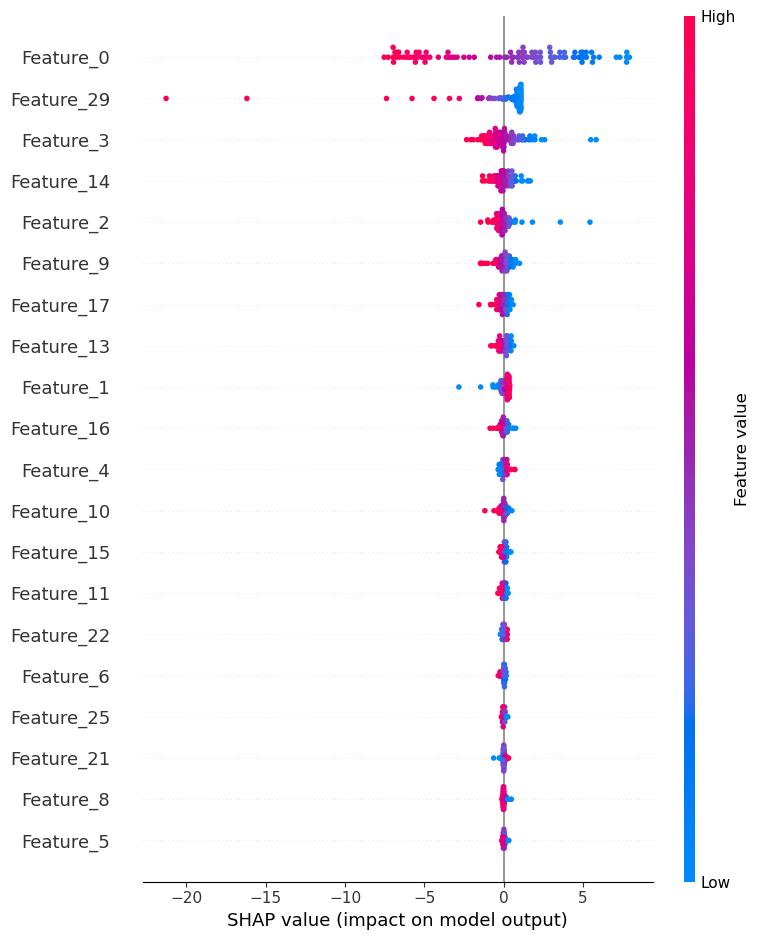

TypeError: loop of ufunc does not support argument 0 of type Explanation which has no callable conjugate method

In [27]:
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Define models along with their training and testing data
models = [
    ('Logistic Regression', LogisticRegression(C=1, solver='liblinear'), (X_train, Y_train), (X_test, Y_test)),
    ('Random Forest', RandomForestClassifier(n_estimators=30, max_depth=3), (X_train, Y_train), (X_test, Y_test)),
    ('XGBClassifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'), (X_train, Y_train), (X_test, Y_test)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=5), (X_train, Y_train), (X_test, Y_test))
]

# Iterate over models for SHAP explanations
for name, model, (X_train, Y_train), (X_test, Y_test) in models:
    print(f"\n### Training {name} ###\n")
    
    # Train the model
    model.fit(X_train, Y_train)
    
    # Convert X_test to DataFrame if it's a numpy array
    if isinstance(X_test, np.ndarray):
        X_test = pd.DataFrame(X_test, columns=[f"Feature_{i}" for i in range(X_test.shape[1])])

    # Sample a subset of test data for efficiency
    X_sample = X_test.sample(100, random_state=42)

    print(f"\n### SHAP Explanation for {name} ###\n")

    # Initialize SHAP Explainer
    explainer = shap.Explainer(model, X_sample)
    shap_values = explainer(X_sample)

    # Extract SHAP values correctly (this is now numeric)
    shap_values_array = shap_values.values  # This is the numeric part of SHAP values

    # Summary Plot (Global Feature Importance)
    shap.summary_plot(shap_values, X_sample)

    # Force Plot (Fixed)
    shap.initjs()
    shap.force_plot(explainer.expected_value, shap_values_array[0], X_sample.iloc[0])

    # Dependence Plot (Fixed)
    shap.dependence_plot(X_sample.columns[0], shap_values, X_sample)

# Initialize LIME Explainer (Only once since data remains the same)
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature_{i}" for i in range(X_train.shape[1])],
    class_names=['Not Fraud', 'Fraud'],
    mode='classification'
)

# Iterate over models for LIME explanations
for name, model, (X_train, Y_train), (X_test, Y_test) in models:
    print(f"\n### LIME Explanation for {name} ###\n")
    
    # Convert X_test to DataFrame if it's a numpy array
    if isinstance(X_test, np.ndarray):
        X_test = pd.DataFrame(X_test, columns=[f"Feature_{i}" for i in range(X_test.shape[1])])

    # Explain a single prediction (Ensure it’s a single instance)
    i = 10  # Choose an instance to explain
    exp = explainer_lime.explain_instance(X_test.iloc[i].values, model.predict_proba)

    # Show LIME feature importance
    exp.show_in_notebook()
    exp.as_pyplot_figure()
    plt.show()


TypeError: only integer scalar arrays can be converted to a scalar index

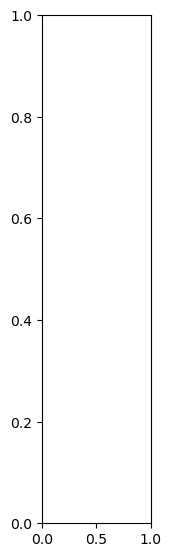

In [33]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Train the model (replace this with your actual trained model if needed)
model = LogisticRegression(C=1, solver='liblinear')
model.fit(X_train, Y_train)

# Select a subset of data for explanation (only a sample of X_test)
X_sample = X_test.sample(100, random_state=42)

# Initialize SHAP Explainer using model's predict_proba method for classification
explainer = shap.Explainer(model.predict_proba, X_sample)
shap_values = explainer(X_sample)

# **1. Summary Plot: Global Feature Importance**
shap.summary_plot(shap_values, X_sample)

# **2. Force Plot: Single Prediction Explanation**
shap.initjs()

# Accessing the expected value for the positive class (class 1)
# Make sure the `expected_value` is accessed correctly for binary classification
shap.force_plot(shap_values.expected_value[1], shap_values.values[0], X_sample.iloc[0])

# **3. Dependence Plot: Feature Relationship**
# Replace "feature_name" with the actual column name from your data
shap.dependence_plot("feature_name", shap_values, X_sample)


In [ ]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# Load trained model and dataset
model = LogisticRegression  # Replace with your actual trained model
X_sample = X_test.sample(100)  # Select a subset for efficiency

# Initialize SHAP Explainer
explainer = shap.Explainer(model, X_sample)
shap_values = explainer(X_sample)

# **1. Summary Plot: Global Feature Importance**
shap.summary_plot(shap_values, X_sample)

# **2. Force Plot: Single Prediction Explanation**
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0].values, X_sample.iloc[0])

# **3. Dependence Plot: Feature Relationship**
shap.dependence_plot("feature_name", shap_values, X_sample)
